# 課程目標:
    
    了解MLP 在神經網路上的應用

# 範例重點:
    以Keras 自帶的 手寫辨識的數據集來說明 MLP 建構的網路模型

# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#宣告採用序列模型
model = Sequential()

W0817 21:47:20.928493 4804998592 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [8]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

W0817 21:47:20.964742 4804998592 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 21:47:20.968192 4804998592 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



In [9]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

W0817 21:47:21.029449 4804998592 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0817 21:47:21.059878 4804998592 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

W0817 21:47:21.223495 4804998592 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0817 21:47:21.272788 4804998592 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 271us/step - loss: 0.2699 - acc: 0.9223 - val_loss: 0.1319 - val_acc: 0.9621
Epoch 2/10
48000/48000 [==============================] - 12s 256us/step - loss: 0.1073 - acc: 0.9684 - val_loss: 0.1033 - val_acc: 0.9698
Epoch 3/10
48000/48000 [==============================] - 12s 256us/step - loss: 0.0706 - acc: 0.9782 - val_loss: 0.0913 - val_acc: 0.9736
Epoch 4/10
48000/48000 [==============================] - 12s 245us/step - loss: 0.0514 - acc: 0.9843 - val_loss: 0.0801 - val_acc: 0.9764
Epoch 5/10
48000/48000 [==============================] - 13s 272us/step - loss: 0.0368 - acc: 0.9885 - val_loss: 0.0788 - val_acc: 0.9756
Epoch 6/10
48000/48000 [==============================] - 11s 238us/step - loss: 0.0263 - acc: 0.9919 - val_loss: 0.0760 - val_acc: 0.9786
Epoch 7/10
48000/48000 [==============================] - 11s 226us/step - loss: 0.0198 - acc: 0.9942 - val_loss: 0.

# 以圖形顯示訓練過程

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

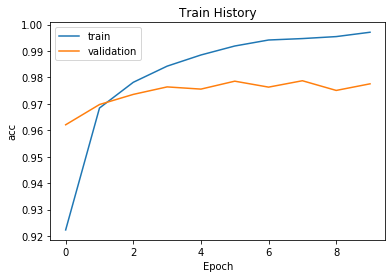

In [14]:
show_train_history(train_history,'acc','val_acc')

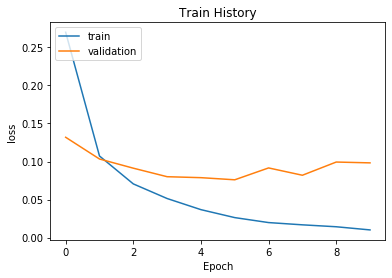

In [15]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [16]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 30us/step

accuracy= 0.9795


# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [17]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [18]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [19]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [20]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [21]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [22]:
from keras.models import Sequential
from keras.layers import Dense

In [23]:
#建立模型

In [24]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

In [25]:
model.add(Dense(units = 256,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))

In [26]:
model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))

In [27]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [28]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [29]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 262us/step - loss: 0.2692 - acc: 0.9225 - val_loss: 0.1323 - val_acc: 0.9619
Epoch 2/10
48000/48000 [==============================] - 10s 210us/step - loss: 0.1074 - acc: 0.9685 - val_loss: 0.1021 - val_acc: 0.9698
Epoch 3/10
48000/48000 [==============================] - 10s 214us/step - loss: 0.0707 - acc: 0.9785 - val_loss: 0.0924 - val_acc: 0.9714
Epoch 4/10
48000/48000 [==============================] - 10s 213us/step - loss: 0.0512 - acc: 0.9840 - val_loss: 0.0811 - val_acc: 0.9754
Epoch 5/10
48000/48000 [==============================] - 10s 215us/step - loss: 0.0367 - acc: 0.9889 - val_loss: 0.0805 - val_acc: 0.9754
Epoch 6/10
48000/48000 [==============================] - 11s 236us/step - loss: 0.0263 - acc: 0.9920 - val_loss: 0.0779 - val_acc: 0.9772
Epoch 7/10
48000/48000 [==============================] - 11s 228us/step - loss: 0.0197 - acc: 0.9941 - val_loss: 0.

# 以圖形顯示訓練過程

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline 
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

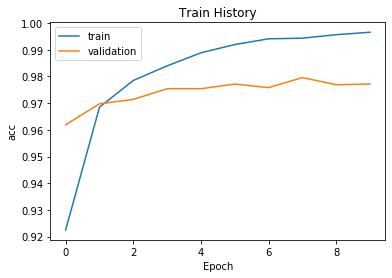

In [31]:
show_train_history(train_history,'acc','val_acc')

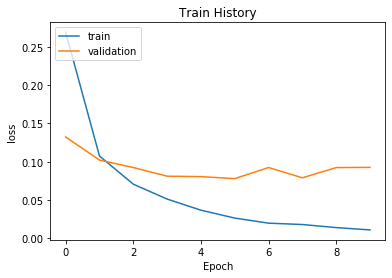

In [32]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [33]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 27us/step

accuracy= 0.9771
